## Introduction to Machine Learning Implementation with PyTorch

*Most of the basic ideas are from [모두를 위한 머신러닝/딥러닝 강의](http://hunkim.github.io/ml/). All implementations posted can only be used for educational purposes with references to the original author, Sangjun Park. MS, Korea University, College of Medicine*

### Brief overview of PyTorch

PyTorch is an open-source python package explicitly developed for advanced research and application on deep learning. Pros when compared to Tensorflow are wide accessibility, intuitiveness of design, and __extreme dynamicity__ (which is the most fundamental difference between the two modules) when dealing with computation graphs. The only disadvantage regarding PyTorch is that compared to its superiority, it is still relatively a more recent product than Tensorflow, which makes it harder to gain much attention in most corporate settings. However, it is certain that the current paradigm is being shifted towards what we will discuss further, as more and more researchers are applying PyTorch as the main source of their works.

Installation, basic concepts and syntax documentations can be found at the [official pytorch website](https://pytorch.org/).

### Linear Regression

#### Single-variable Linear Regression

The mathematical model for single-variable linear regression is as follows.

$$y = \beta_{0} + \beta_{1}x$$

We call $\beta_{1}$ as the regression coefficient or the slope, and $\beta_{0}$ as the intercept. This model is also called simple linear regression.

Let us first examine the exact solution using the least squares method. The method of least squares states that the sum of squares between the actual value and the fitted value, should be minimum. Using formal notations, minimization of $$(\underset{\text{Fitted value}}{\hat{y}} - \underset{\text{Actual value}}{y})^2$$ is the goal of this model.

The exact solution to this problem is the following whose derivations will be omitted. 

$$
\beta_{1} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}} 
\; \text{($\bar{x}$ and $\bar{y}$ are the mean values of x and y)}
$$
.l
$$
\beta_{0} = \bar{y} - \beta_{1}\bar{x}
$$

For this example, we will use the following data. $$x = \begin{bmatrix}1.05&1.54&2.01&2.55&3.13&3.45&4.02&4.65&5.34&5.50\end{bmatrix}^{T}$$ $$y = \begin{bmatrix}10.3&15.4&21.2&25.4&30.1&35.6&40.5&43.4&50.1&56.6\end{bmatrix}^{T}$$

0.7824239351471718 9.650293641652478


Text(4, 30, '$y = 0.78 + 9.65x$')

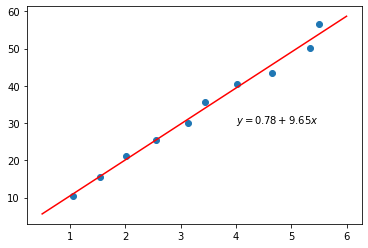

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.05, 1.54, 2.01, 2.55, 3.13, 3.45, 4.02, 4.65, 5.34, 5.50])
y = np.array([10.3, 15.4, 21.2, 25.4, 30.1, 35.6, 40.5, 43.4, 50.1, 56.6])

b1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
b0 = np.mean(y) - b1 * np.mean(x)

x_range = np.linspace(0.5, 6.0, 1000)
y_hat = b0 + b1 * x_range

print(b0, b1)

plt.scatter(x, y)
plt.plot(x_range, y_hat, 'r')
plt.text(4, 30, "$y = 0.78 + 9.65x$")

Next, let's use the gradient descent method using PyTorch.

In [119]:
import torch
from torch.autograd import Variable

class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize, bias = True)

    def forward(self, x):
        out = self.linear(x)
        return out
    
inputDim = 1
outputDim = 1
learningRate = 0.001 
epochs = 10000

model = linearRegression(inputDim, outputDim)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

x_torch = torch.from_numpy(x).float().unsqueeze(dim=1)
y_torch = torch.from_numpy(y).float().unsqueeze(dim=1)

epoch_graph = np.array([])
loss_graph = np.array([])

for epoch in range(epochs):
    
    inputs = x_torch
    labels = y_torch

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cumulate gradients
    optimizer.zero_grad()

    # get output from the model with given inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    
    # get gradients with respect to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    epoch_graph = np.append(epoch_graph, epoch)
    loss_graph = np.append(loss_graph, loss.item())

Text(0, 0.5, 'Loss in Log scale')

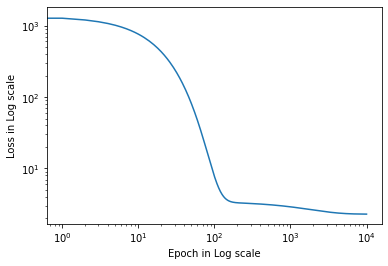

In [115]:
plt.loglog(epoch_graph, loss_graph)
plt.xlabel('Epoch in Log scale')
plt.ylabel('Loss in Log scale')

In [116]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[9.6200]], requires_grad=True)
Parameter containing:
tensor([0.9013], requires_grad=True)


Text(4, 30, '$y=0.9013+9.6200x$')

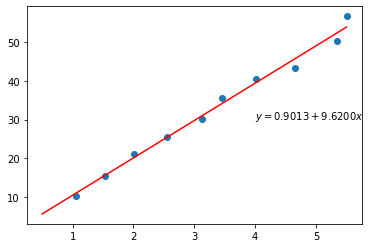

In [117]:
x_range2 = np.linspace(0.5, 5.5, 10)
y_hat2 = model(torch.from_numpy(x_range2).float().unsqueeze(dim=1))
plt.scatter(x, y)
plt.plot(x_range2, y_hat2.detach().numpy(), 'r')
plt.text(4, 30, "$y=0.9013+9.6200x$")